# Fuzzy Logic Modeling with Python

<b>The modeling of the detergent amount of the washing machine with the Mamdani type fuzzy logic system will be shown on the example. The first step to apply fuzzy logic to a system is to determine the inputs and outputs of the system. In the example problem, the user expects the washing machine to clean the laundry and not damage the laundry. For these expectations, fuzzy logic The inputs of the model and all parameters are very important. The inputs to be applied to the problem are the amount of laundry, the degree of soiling and the type of laundry. These inputs will determine the amount of detergent to be used by the machine.

The model is aimed to analyze the most economical and successful washing conditions according to the amount of laundry, the degree of soiling of the laundry and the type of laundry. After the inputs are determined, the membership functions and parameters of the inputs should be determined.

The membership functions of the inputs are determined as follows:

$amount of laundry = \begin{cases}
 & \text{ few (trapezoid)} =(0,1,5,8)\\
 & \text{ middle(triangle) } =(6,12,18) \\
 & \text{ a lot(trapezoid) } = (15,20,30,30)
\end{cases}$

$degree of dirty = \begin{cases}
 & \text{ a little dirty (trapezoid)} =(0,5,15,35)\\
 & \text{ middle dirty (triangle) } =(15,50,85) \\
 & \text{ a lot dirty (trapezoid)} = (65,100,120,120)
\end{cases}$

$type of laundry = \begin{cases}
 & \text{ sensitive (trapezoid)} =(0,5,15,35)\\
 & \text{ mixed (triangle) } =(15,50,85) \\
 & \text{ strong (trapezoid)} = (65,100,120,120)
\end{cases}$

<b>Membership functions and parameters of the output:

$amount of detergent = \begin{cases}
 & \text{ too little (trapezoid)} =(0,5,15,20)\\
 & \text{ little (triangle)} =(17,32,42) \\
 & \text{ normal (triangle)} = (32,57,67)\\
 & \text{ a lot (triangle)} = (57,67,92) \\
 & \text{ too much (trapezoid)} = (82,92,100,100)
\end{cases}$

<b>After determining the membership functions and parameters of the input and output, it is necessary to determine the rule base in order to create the fuzzy logic model. Some of the rules created for this problem are as follows:

<b>1-) If the amount of laundry = few AND degree of dirty = a little dirty AND type of laundry = sensitive, IF amount of detergent = too little

2-) If the amount of laundry = few AND degree of dirty = a lot dirty AND type of laundry = mixed, IF amount of detergent = normal

3-) If amount of laundry = middle AND degree of dirty = middle dirty AND type of laundry = strong IF amount of detergent = normal

4-) If the amount of laundry = a lot AND degree of dirty = a lot dirty AND type of laundry = mixed IF amount of detergent = too much<b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import membership as mf

<b>We define a range for the amount of laundry, the degree of dirty, the type of laundry and the amount of detergent.

In [2]:
range_laundry = np.arange(0, 31)
range_dirty = np.arange(0, 121)
range_type_laundry = np.arange(0, 121)
range_detergent = np.arange(0, 101)

<b>We create a membership function for each of the linguistic values we have determined. 'trapmf' means trapezoidal membership function and 'trimf' means triangle membership function. For detailed information about the functions, you can refer to the Scikit-Fuzzy documentation.

In [3]:
laoundry_few = mf.trapmf(range_laundry, [0,1,5,8])
laoundry_middle = mf.trimf(range_laundry, [6,12,18])
laoundy_alot = mf.trapmf(range_laundry, [15,20,30,30])

dirty_alittle = mf.trapmf(range_dirty, [0,5,15,35])
dirty_middle = mf.trimf(range_dirty, [15,50,85])
dirty_alot = mf.trapmf(range_dirty, [65,100,120,120])

type_laundry_sensitive = mf.trapmf(range_type_laundry, [0,5,15,35])
type_laundry_mixed = mf.trimf(range_type_laundry, [15,50,85])
type_laundry_strong = mf.trapmf(range_type_laundry, [65,100,120,120])

detergent_toolittle = mf.trapmf(range_detergent, [0,5,15,20])
detergent_little = mf.trimf(range_detergent, [17,32,42])
detergent_normal = mf.trimf(range_detergent, [32,57,67])
detergent_alot = mf.trimf(range_detergent, [57,67,92])
detergent_toomuch = mf.trapmf(range_detergent, [82,92,100,100])


<b>Let's graph the membership functions we created above and examine their appearance.

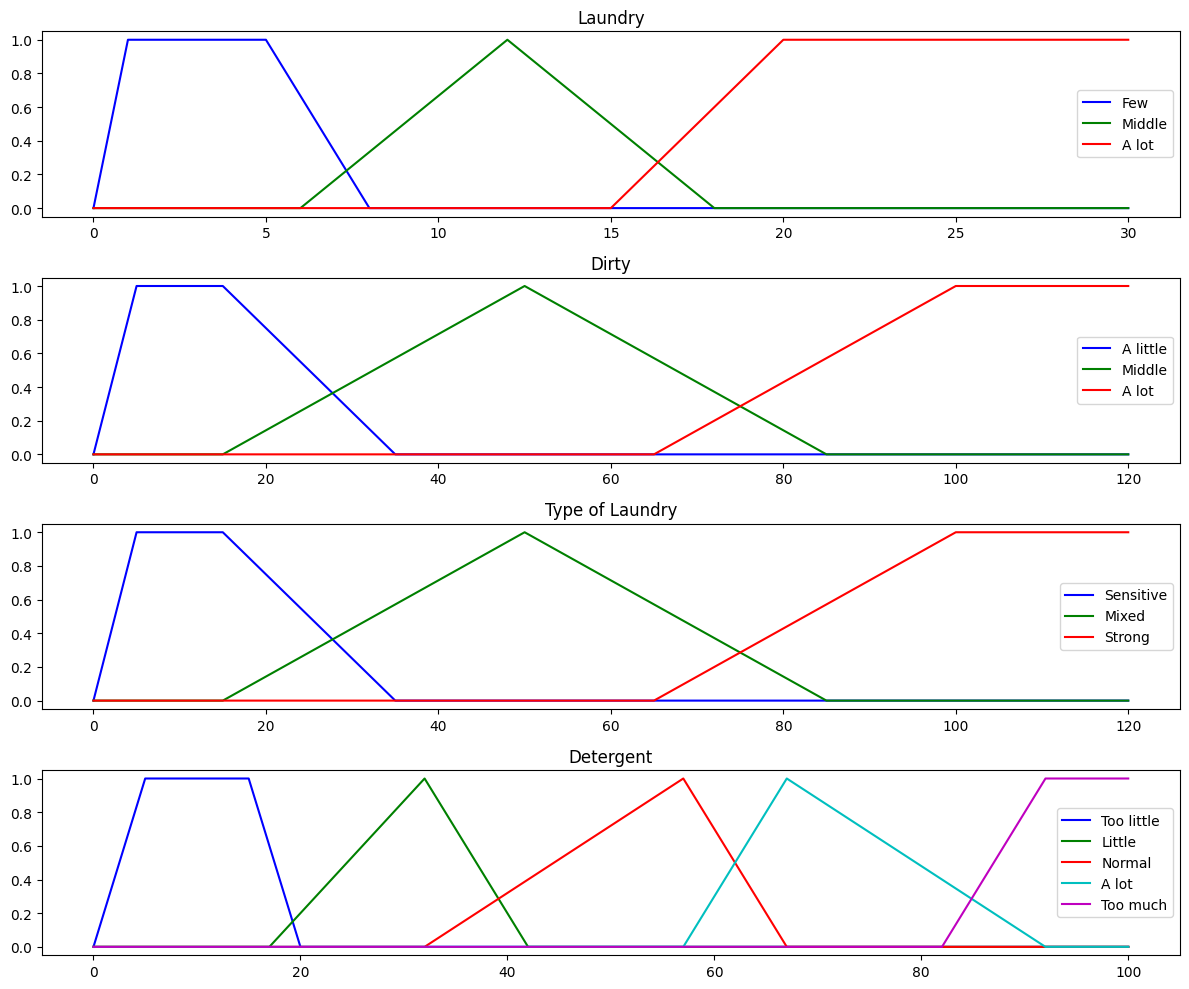

In [4]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(12, 10))

ax0.plot(range_laundry, laoundry_few, 'b', linewidth=1.5, label='Few')
ax0.plot(range_laundry, laoundry_middle, 'g', linewidth=1.5, label='Middle')
ax0.plot(range_laundry, laoundy_alot, 'r', linewidth=1.5, label='A lot')
ax0.set_title('Laundry')
ax0.legend()

ax1.plot(range_dirty, dirty_alittle, 'b', linewidth=1.5, label='A little')
ax1.plot(range_dirty, dirty_middle, 'g', linewidth=1.5, label='Middle')
ax1.plot(range_dirty, dirty_alot, 'r', linewidth=1.5, label='A lot')
ax1.set_title('Dirty')
ax1.legend()

ax2.plot(range_type_laundry, type_laundry_sensitive, 'b', linewidth=1.5, label='Sensitive')
ax2.plot(range_type_laundry, type_laundry_mixed, 'g', linewidth=1.5, label='Mixed')
ax2.plot(range_type_laundry, type_laundry_strong, 'r', linewidth=1.5, label='Strong')
ax2.set_title('Type of Laundry')
ax2.legend()

ax3.plot(range_detergent, detergent_toolittle, 'b', linewidth=1.5, label='Too little')
ax3.plot(range_detergent, detergent_little, 'g', linewidth=1.5, label='Little')
ax3.plot(range_detergent, detergent_normal, 'r', linewidth=1.5, label='Normal')
ax3.plot(range_detergent, detergent_alot, 'c', linewidth=1.5, label='A lot')
ax3.plot(range_detergent, detergent_toomuch, 'm', linewidth=1.5, label='Too much')
ax3.set_title('Detergent')
ax3.legend()

plt.tight_layout()


<b>Now let's look at the membership degrees to the fuzzy sets we created for the new inputs.

In [5]:
input_laundry = 7
input_dirty = 25
input_type_laundry = 30